The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.



The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the nobel.csv file in the data folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Analyze Nobel Prize winner data and identify patterns by answering the following questions:

**What is the most commonly awarded gender and birth country?

Store your answers as string variables top_gender and top_country.

**Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

Store this as an integer called max_decade_usa.

**Which decade and Nobel Prize category combination had the highest proportion of female laureates?

Store this as a dictionary called max_female_dict where the decade is the key and the category is the value. There should only be one key:value pair.
Who was the first woman to receive a Nobel Prize, and in what category?

Save your string answers as first_woman_name and first_woman_category.
Which individuals or organizations have won more than one Nobel Prize throughout the years?

Store the full names in a list named repeat_list.


In [12]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Start coding here!

### Explore the dataset

In [2]:
nobel = pd.read_csv("/Users/auroraxiao/Desktop/Data Science Project/DS-Projects/Data Set/nobel.csv")

In [4]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## What is the most commonly rewarded gender?

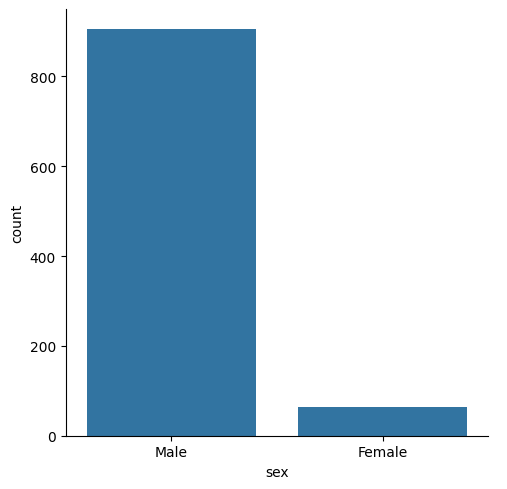

In [13]:
sns.catplot(data = nobel, x = "sex", kind = "count")
plt.show()

top_gender = "Male"

In [14]:
print(top_gender)

Male


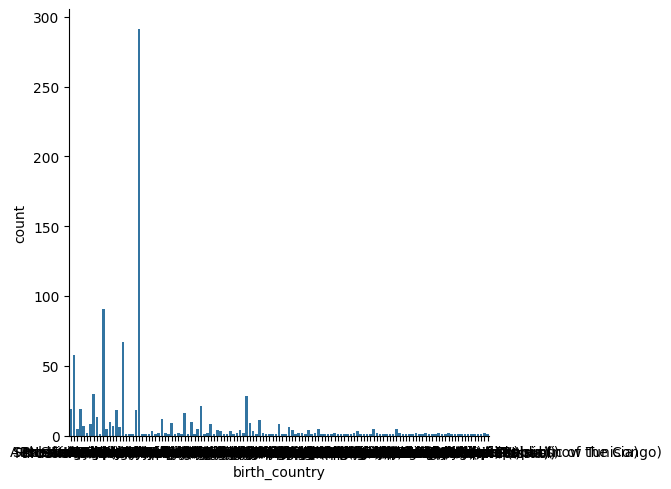

In [15]:
sns.catplot(data = nobel, x = "birth_country", kind = "count")
plt.show() ## this is too crowded to see

In [19]:
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## What is the most commonly awarded birth country?

In [24]:
nobel["birth_country"].value_counts()

birth_country
United States of America                                291
United Kingdom                                           91
Germany                                                  67
France                                                   58
Sweden                                                   30
                                                       ... 
Belgian Congo (now Democratic Republic of the Congo)      1
Ethiopia                                                  1
Lebanon                                                   1
Philippines                                               1
French protectorate of Tunisia (now Tunisia)              1
Name: count, Length: 129, dtype: int64

In [26]:
nobel.groupby("birth_country")[["full_name"]].agg("count").sort_values(by = "full_name", ascending = False)

,full_name
birth_country,
United States of America,291
United Kingdom,91
Germany,67
France,58
Sweden,30
...,...
Tuscany (Italy),1
Venezuela,1
Vietnam,1


In [23]:
nobel.isnull().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [27]:
top_country = "United States of America"

In [28]:
### create a new column called decade

nobel['decade'] = (nobel['year'] // 10) * 10

In [31]:
us_nobel_by_decade = nobel[nobel['birth_country'] == top_country].groupby('decade')[["full_name"]].count()


In [34]:
us_nobel_by_decade.reset_index(inplace = True)

In [35]:
nobel_by_decade = nobel.groupby('decade')[["full_name"]].count()

In [37]:
nobel_by_decade.reset_index(inplace = True)

In [39]:
nobel_by_decade_merge = nobel_by_decade.merge(us_nobel_by_decade, on = "decade", suffixes = ("_all", "_us"))

In [41]:
nobel_by_decade_merge['ratio'] = nobel_by_decade_merge["full_name_us"] / nobel_by_decade_merge["full_name_all"] 

In [44]:
nobel_by_decade_merge.sort_values(by = "decade", ascending = False)

,decade,full_name_all,full_name_us,ratio
12,2020,50,18,0.360000
11,2010,121,38,0.314050
10,2000,123,52,0.422764
9,1990,104,42,0.403846
8,1980,97,31,0.319588
7,1970,104,33,0.317308
6,1960,79,21,0.265823
5,1950,72,21,0.291667
4,1940,43,13,0.302326
3,1930,56,14,0.250000


In [45]:
max_decade_usa = 2020

## Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [54]:
by_category_decade = nobel.groupby(['decade', 'category'])[['full_name']].count().reset_index()

In [58]:
by_category_decade_female = nobel[nobel['sex']== 'Female'].groupby(['decade', 'category'])[['full_name']].count().reset_index()

In [61]:
merged_by_category_by_decade = by_category_decade_female.merge(by_category_decade, on= ['decade', 'category'], suffixes = ("_female", "_all"))

In [62]:
merged_by_category_by_decade['ratio'] = merged_by_category_by_decade['full_name_female'] / merged_by_category_by_decade['full_name_all']

In [64]:
merged_by_category_by_decade.sort_values(by = 'ratio', ascending = False )
max_female_dict = {2020: 'Literature'}

## Who was the first woman to receive a Nobel Prize, and in what category?

In [66]:
nobel[nobel['sex'] == 'Female'].sort_values(by = 'year', ascending = True)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,1900
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,468,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Female,NaN,NaN,NaN,1914-06-21,Vienna,Austria,1900
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,579,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Female,NaN,NaN,NaN,1940-03-16,Mårbacka,Sweden,1900
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,1910
128,1926,Literature,The Nobel Prize in Literature 1926,"""for her idealistically inspired writings whic...",1/1,597,Individual,Grazia Deledda,1871-09-27,"Nuoro, Sardinia",Italy,Female,NaN,NaN,NaN,1936-08-15,Rome,Italy,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982,2022,Literature,The Nobel Prize in Literature 2022,"""for the courage and clinical acuity with whic...",1/1,1017,Individual,Annie Ernaux,1940-09-01,Lillebonne,France,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020
989,2023,Medicine,The Nobel Prize in Physiology or Medicine 2023,"""for their discoveries concerning nucleoside b...",1/2,1024,Individual,Katalin Karikó,1955-01-17,Szolnok,Hungary,Female,Szeged University,Szeged,Hungary,NaN,NaN,NaN,2020
993,2023,Physics,The Nobel Prize in Physics 2023,"""for experimental methods that generate attose...",1/3,1028,Individual,Anne L’Huillier,1958-08-16,Paris,France,Female,Lund University,Lund,Sweden,NaN,NaN,NaN,2020
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaN,NaN,NaN,2020


In [67]:
first_woman_name = 'Marie Curie'
first_woman_category = 'Physics'

## Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [80]:
counts = nobel.groupby('full_name').size().reset_index(name='count')
individual_ = counts[counts['count'] > 1]

In [81]:
counts_org = nobel.groupby('organization_name').size().reset_index(name='count')
organization_ = counts_org[counts_org['count'] > 1]

In [83]:
individual_

,full_name,count
162,Comité international de la Croix Rouge (Intern...,3
284,Frederick Sanger,2
480,John Bardeen,2
576,Linus Carl Pauling,2
601,"Marie Curie, née Sklodowska",2
672,Office of the United Nations High Commissioner...,2


In [84]:
organization_= organization_["organization_name"]
individual_= individual_["full_name"]

In [88]:
repeat_list = organization_.to_list() + individual_.to_list()

In [89]:
repeat_list

['Academy of Sciences',
 'Amsterdam University',
 'Australian National University',
 'Basel Institute for Immunology',
 'Bell Laboratories',
 'Bell Telephone Laboratories',
 'Berlin University',
 'Brown University',
 'CERN',
 'California Institute of Technology (Caltech)',
 'Carnegie Mellon University',
 'Collège de France',
 'Columbia University',
 'Copenhagen University',
 'Cornell University',
 'Edinburgh University',
 'Eidgenössische Technische Hochschule (Swiss Federal Institute of Technology)',
 'Fred Hutchinson Cancer Research Center',
 'Fritz-Haber-Institut der Max-Planck-Gesellschaft',
 'General Electric Company',
 'Goettingen University',
 'Graz University',
 'Harvard Medical School',
 'Harvard University',
 'Howard Hughes Medical Institute',
 'IBM Zurich Research Laboratory',
 'Imperial Cancer Research Fund',
 'Imperial College',
 'Indiana University',
 'Institut Pasteur',
 'Institut du Radium',
 'Institute for Advanced Study',
 'Johns Hopkins University',
 'Johns Hopkins Un